# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

refer to this
https://uci.bootcampcontent.com/UCI-Coding-Bootcamp/uci-irv-data-pt-12-2020-u-c/blob/master/Homework/06-Python-APIs/Instructions/starter_code/WeatherPy.ipynb

Your final notebook must:

Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.
Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress
import csv
import matplotlib.pyplot as plt
from scipy import stats
#import logging
#logging.basicConfig(level=logging.DEBUG)
import time
import datetime as dt
#    t1 = dt. datetime. strptime('12:00:00', '%H:%M:%S')
#    t2 = dt. datetime. strptime('02:00:00', '%H:%M:%S')
#    time_zero = dt. datetime. strptime('00:00:00', '%H:%M:%S')
#    print((t1 - time_zero + t2). time())

# Import API key
from api_keys_6 import weather_api_key
api_key = weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [24]:
#weather_data_to_load= "weatherpy_data.csv"
#weather_data = pd.read_csv(weather_data_to_load)

#weather_data_print_example= "weather_data_print.csv"
#weather_data_print = pd.read_csv(weather_data_print_example)

In [26]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

 Extract latitude and longitude
lats = geo_data["results"][0]["geometry"]["location"]["lat"]
lngs = geo_data["results"][0]["geometry"]["location"]["lng"]

#Print the latitude and longitude
print('''
    City: {0}
    Latitude: {1}
    Longitude: {2}
    '''.format(target_city, lat, lng))

In [41]:
 # List for holding lat_lngs and cities
    
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)



In [42]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['lebu', 'jamestown', 'barrow', 'dunedin', 'tasiilaq', 'rikitea', 'navalcarnero', 'raudeberg', 'richards bay', 'kapaa', 'novoagansk', 'berlevag', 'ilulissat', 'capao da canoa', 'jiuquan', 'mirina', 'kaitangata', 'ulaangom', 'bone', 'port moresby', 'ushuaia', 'jaciara', 'thompson', 'port elizabeth', 'portland', 'ribeira grande', 'saskylakh', 'busselton', 'cidreira', 'kahului', 'cape town', 'mar del plata', 'mataura', 'ingham', 'hobart', 'barentsburg', 'punta arenas', 'ternate', 'mountain home', 'ostrovnoy', 'hithadhoo', 'narsaq', 'camacha', 'kloulklubed', 'port alfred', 'illoqqortoormiut', 'puerto ayora', 'sorong', 'yellowknife', 'upernavik', 'ouango', 'atuona', 'tabiauea', 'inndyr', 'amahai', 'airai', 'mweka', 'zolotinka', 'hilo', 'makat', 'carnarvon', 'cayenne', 'truth or consequences', 'beringovskiy', 'rosarito', 'umm lajj', 'chokurdakh', 'albany', 'sentyabrskiy', 'ancud', 'ambovombe', 'margate', 'bathsheba', 'alofi', 'hervey bay', 'nantucket', 'fairbanks', 'nobeoka', 'vaini', 'khani

600

AttributeError: 'list' object has no attribute 'to_csv'

In [83]:
print(cities[0:5])

['lebu', 'jamestown', 'barrow', 'dunedin', 'tasiilaq']


In [86]:
trial=cities[0:5]
trial

['lebu', 'jamestown', 'barrow', 'dunedin', 'tasiilaq']

In [93]:
country= []
lat= []
lon= []
temp= []
temp_max= []
cloudiness= []
humidity= []
date= []
citylist= []
windspeed=[]

In [94]:
for city in trial:
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        citylist.append(response['name'])
        windspeed.append(response['wind']['speed'])
    except (KeyError):
        print('working through to next data...')

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=lebu HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=jamestown HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=barrow HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=dunedin HTTP

In [95]:
   weather_dict_trial = {
    "citylist": citylist,
    "country": country, 
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "temp_max": temp_max,
    "cloudiness": cloudiness,
    "humidity": humidity,
    "windspeed": windspeed,
    "date": date,
    
}
    

In [97]:
weather_data_trial = pd.DataFrame(weather_dict_trial)
weather_data_trial

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date
0,Lebu,CL,-37.6167,-73.6500,17.99,17.99,1,73,4.52,1614967499
1,Jamestown,US,42.0970,-79.2353,-3.10,-2.78,90,91,8.32,1614967499
2,Barrow,US,71.2906,-156.7887,-23.00,-23.00,90,64,9.77,1614967500
3,Dunedin,NZ,-45.8742,170.5036,9.96,9.96,97,81,2.14,1614967500
4,Tasiilaq,GL,65.6145,-37.6368,4.00,4.00,75,81,5.66,1614967501


### Clean_Run_API_Calls

In [99]:
len(cities)

600

In [100]:
country= []
lat= []
lon= []
temp= []
temp_max= []
cloudiness= []
humidity= []
date= []
citylist= []
windspeed=[]

In [101]:
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        citylist.append(response['name'])
        windspeed.append(response['wind']['speed'])
    except (KeyError):
        print('working through to next data...')

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=lebu HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=jamestown HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=barrow HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=dunedin HTTP

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=kaitangata HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=ulaangom HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=bone HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=port%20moresby HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): ap

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=punta%20arenas HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=ternate HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=mountain%20home HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=ostrovnoy HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTP connectio

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=puerto%20ayora HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=sorong HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=yellowknife HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=upernavik HTTP/1.1" 200 498
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1)

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=inndyr HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=amahai HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=airai HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=mweka HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweatherm

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=hilo HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=makat HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=carnarvon HTTP/1.1" 200 460
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=cayenne HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweath

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=ancud HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=ambovombe HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=margate HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=bathsheba HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.open

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=tuktoyaktuk HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=ranong HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=mys%20shmidta HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80


working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=east%20london HTTP/1.1" 200 460
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=nikolskoye HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=ponta%20do%20sol HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=butaritari HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTP conne

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=bonavista HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=sitka HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=lata HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=paciran HTTP/1.1" 200 505
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweath

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=liwale HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=dikson HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=kuala%20terengganu HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=saldanha HTTP/1.1" 200 457
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): 

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=khatanga HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=guerrero%20negro HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=bafq HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=mongo HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.o

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=chumikan HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=toliary HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80


working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=houma HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=maldonado HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=ilhabela HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=pemangkat HTTP/1.1" 200 502
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.ope

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=simpang HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=svetlogorsk HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=gimli HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=severo-kurilsk HTTP/1.1" 200 506
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): a

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=kieta HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=olafsvik HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=vaitupu HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80


working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=kavieng HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=nizhneyansk HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80


working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=bac%20lieu HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=provideniya HTTP/1.1" 200 503
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=kristiansund HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=adrar HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): 

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=sangar HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=west%20richland HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=kralendijk HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=san%20isidro HTTP/1.1" 200 460
DEBUG:urllib3.connectionpool:Starting new HTTP connection 

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=henties%20bay HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=bredasdorp HTTP/1.1" 200 458
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=anadyr HTTP/1.1" 200 507
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=eureka HTTP/1.1" 200 544
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=zaragoza HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=alice%20springs HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=la%20ronge HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=soe HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): ap

DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=fukue HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=tura HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=matadi HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=marcona HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweatherma

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=mosquera HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=saint%20george HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=tomatlan HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=chuy HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=coquimbo HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=san%20vicente%20de%20chucuri HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=san%20luis HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=pacific%20grove HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting ne

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=hualmay HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=pevek HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=lasa HTTP/1.1" 200 457
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=ambatofinandrahana HTTP/1.1" 200 513
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=itarema HTTP/1.1" 200 503
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=sarangani HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=troitsko-pechorsk HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=alto%20araguaia HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTP connec

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=razole HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=poum HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=arlit HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=namibe HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweatherma

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=antigonish HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=victoria HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=bambous%20virieux HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=ahipara HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTP connection (

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=duz HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80


working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=maridi HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=namatanai HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=soyung HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=dongsheng HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.open

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=benghazi HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=sulphur%20springs HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=sola HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=br

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=nizhniy%20kuranakh HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=beroroha HTTP/1.1" 200 502
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=charters%20towers HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=pacifica HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTP con

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=faanui HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=carauari HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=pasan HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=havre-saint-pierre HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): a

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=san%20francisco%20de%20macoris HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=coihaique HTTP/1.1" 200 459
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=lulea HTTP/1.1" 200 453
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=naze HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTP connec

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=moroni HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=komsomolskiy HTTP/1.1" 200 460
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=fuling HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=boffa HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openw

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=lufilufi HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=jibuti HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=salalah HTTP/1.1" 200 454
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=yishui HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openwea

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=san%20vicente HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=manggar HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=atasu HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=chake%20chake HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): 

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=klyuchevsk HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=sinazongwe HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=torrevieja HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=sao%20filipe HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTP connection (

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=constitucion HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=fernie HTTP/1.1" 200 459
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=tekeli HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=tasbuget HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.ope

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=mkushi HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=sao%20gabriel%20da%20cachoeira HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=khategaon HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=sawakin HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTP co

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=pisco HTTP/1.1" 200 460
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=timizart HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=ritchie HTTP/1.1" 200 453
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=sumbe HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweath

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=pundaguitan HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=banamba HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=belaya%20gora HTTP/1.1" 200 510
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=dogondoutchi HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTP connection 

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=seydisehir HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=northam HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=longkou HTTP/1.1" 200 505
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=havelock HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.op

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=davila HTTP/1.1" 200 458
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=port-gentil HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=west%20bay HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=valp

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=broken%20hill HTTP/1.1" 200 460
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=sakit HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=malumfashi HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=khash HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.o

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=am%20timan HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=edd HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=lat%20yao HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=tezu HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweat

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=gariaband HTTP/1.1" 200 451
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=kuching HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=dali HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=pastavy HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openwea

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=touros HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=matagami HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=kunming HTTP/1.1" 200 453
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=eyemouth HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openw

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=afrikanda HTTP/1.1" 200 513
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=amuntai HTTP/1.1" 200 502
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=kamenskoye HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80


working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=port-de-bouc HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=innisfail HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=muroto HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=tabas HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.op

working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=boa%20vista HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=roura HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80
DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=chagda HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): api.openweathermap.org:80


working through to next data...


DEBUG:urllib3.connectionpool:http://api.openweathermap.org:80 "GET /data/2.5/weather?appid=b7b88b3bd62a120ba8bef3514e063083&units=metric&q=imbituba HTTP/1.1" 200 463


In [102]:
   weather_dict = {
    "citylist": citylist,
    "country": country, 
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "temp_max": temp_max,
    "cloudiness": cloudiness,
    "humidity": humidity,
    "windspeed": windspeed,
    "date": date,
    
}

In [183]:
weather_data = pd.DataFrame(weather_dict)
weather_data

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date
0,Lebu,CL,-37.6167,-73.6500,17.99,17.99,1,73,4.52,1614967499
1,Jamestown,US,42.0970,-79.2353,-3.10,-2.78,90,91,8.32,1614967499
2,Barrow,US,71.2906,-156.7887,-23.00,-23.00,90,64,9.77,1614967500
3,Dunedin,NZ,-45.8742,170.5036,9.96,9.96,97,81,2.14,1614967500
4,Tasiilaq,GL,65.6145,-37.6368,4.00,4.00,75,81,5.66,1614968031
...,...,...,...,...,...,...,...,...,...,...
547,Muroto-misakicho,JP,33.2833,134.1500,16.31,16.31,92,78,5.48,1614968344
548,Tabas,IR,33.5959,56.9244,20.02,20.02,32,44,8.04,1614968345
549,Boa Vista,BR,2.8197,-60.6733,32.00,32.00,75,45,7.20,1614968345
550,Roura,GF,4.7263,-52.3274,26.55,27.22,90,83,3.60,1614968345


### Convert Raw Data to DataFrame

* Export the city data into a .csv.
* Display the DataFrame

In [184]:
weather_data.to_csv ('../apis_weather_vacation_challenge/weather_data.csv', index = False, header=True)

In [185]:
weather_data.head()

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date
0,Lebu,CL,-37.6167,-73.6500,17.99,17.99,1,73,4.52,1614967499
1,Jamestown,US,42.0970,-79.2353,-3.10,-2.78,90,91,8.32,1614967499
2,Barrow,US,71.2906,-156.7887,-23.00,-23.00,90,64,9.77,1614967500
3,Dunedin,NZ,-45.8742,170.5036,9.96,9.96,97,81,2.14,1614967500
4,Tasiilaq,GL,65.6145,-37.6368,4.00,4.00,75,81,5.66,1614968031


#import datetime as dt
pd.Timestamp(1513393355.5, unit='s')
Timestamp('2017-12-16 03:02:35.500000')
weather_data_timeTimestamp= weather_data['date']

In [188]:
wdtimepractice= weather_data.head()

In [189]:
wdtimepractice

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date
0,Lebu,CL,-37.6167,-73.6500,17.99,17.99,1,73,4.52,1614967499
1,Jamestown,US,42.0970,-79.2353,-3.10,-2.78,90,91,8.32,1614967499
2,Barrow,US,71.2906,-156.7887,-23.00,-23.00,90,64,9.77,1614967500
3,Dunedin,NZ,-45.8742,170.5036,9.96,9.96,97,81,2.14,1614967500
4,Tasiilaq,GL,65.6145,-37.6368,4.00,4.00,75,81,5.66,1614968031


In [194]:
wdtimepractice[= pd.Timestamp(1614967499, unit='s')

Timestamp('2021-03-05 18:04:59')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [176]:
humid100= (weather_data["humidity"]>100)
humid100.value_counts()

False    552
Name: humidity, dtype: int64

In [177]:
#  Get the indices of cities that have humidity over 100%.
len(weather_data)
# NOTE:  No cities have a humidity value over 100

552

In [75]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


###NOTE:  No cities have a humidity value over 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [198]:
wdplot= weather_data
wdplot

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date
0,Lebu,CL,-37.6167,-73.6500,17.99,17.99,1,73,4.52,1614967499
1,Jamestown,US,42.0970,-79.2353,-3.10,-2.78,90,91,8.32,1614967499
2,Barrow,US,71.2906,-156.7887,-23.00,-23.00,90,64,9.77,1614967500
3,Dunedin,NZ,-45.8742,170.5036,9.96,9.96,97,81,2.14,1614967500
4,Tasiilaq,GL,65.6145,-37.6368,4.00,4.00,75,81,5.66,1614968031
...,...,...,...,...,...,...,...,...,...,...
547,Muroto-misakicho,JP,33.2833,134.1500,16.31,16.31,92,78,5.48,1614968344
548,Tabas,IR,33.5959,56.9244,20.02,20.02,32,44,8.04,1614968345
549,Boa Vista,BR,2.8197,-60.6733,32.00,32.00,75,45,7.20,1614968345
550,Roura,GF,4.7263,-52.3274,26.55,27.22,90,83,3.60,1614968345


In [200]:
%matplotlib notebook
# Dependencies
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import requests
import time
import random

DEBUG:matplotlib.pyplot:Loaded backend nbAgg version unknown.


<IPython.core.display.Javascript object>


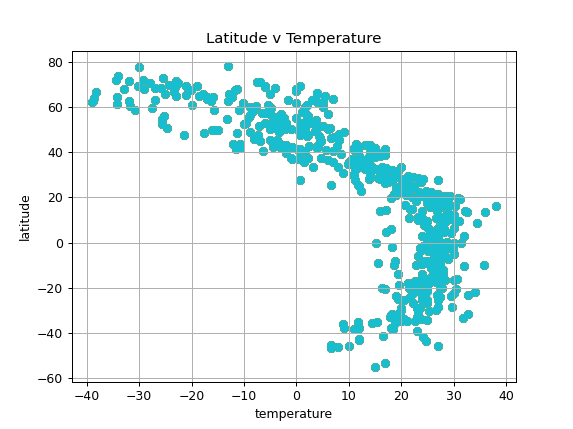

In [203]:
#name and type of graph
plt.title("Latitude v Temperature")
plt.scatter(x=wdplot['temp'], y=wdplot['lat'])

# Plot out values
x_values = wdplot['temp']
y_values = wdplot['lat']
plt.scatter(x_values,y_values)
plt.xlabel('temperature')
plt.ylabel('latitude')
plt.grid(True)

# Save the figure
plt.savefig("lat_temp.png")
plt.show()

In [214]:

###ANALYSIS: This data shows that as the plots move farther from the equator it gets colder


# Fixing random state for reproducibility
np.random.seed(19680801)


N = 4

x = (wdf['lat'])

y = (wdf['humidity'])
colors = np.random.rand(N)
area = (7 * N ** 2)  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


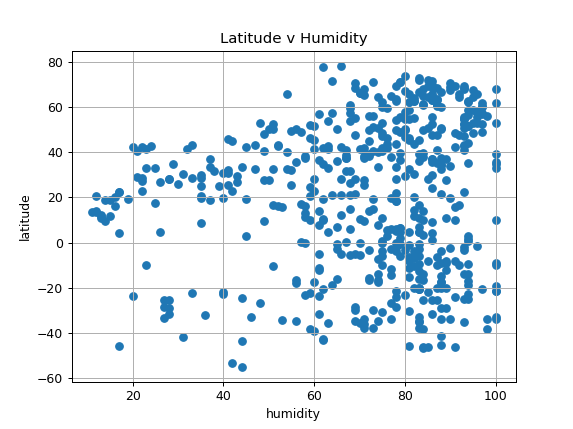

In [215]:
# Build a scatter plot for each data type
plt.scatter(wdplot["humidity"], wdplot["lat"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude v Humidity")
plt.ylabel("latitude")
plt.xlabel("humidity")
plt.grid(True)

# Save the figure
plt.savefig("HumidityandLatitude.png")

# Show plot
plt.show()
#Analysis:  This graph is a bit surprising as there seem to me more humid areas at high or northern latitudes then I would expect

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


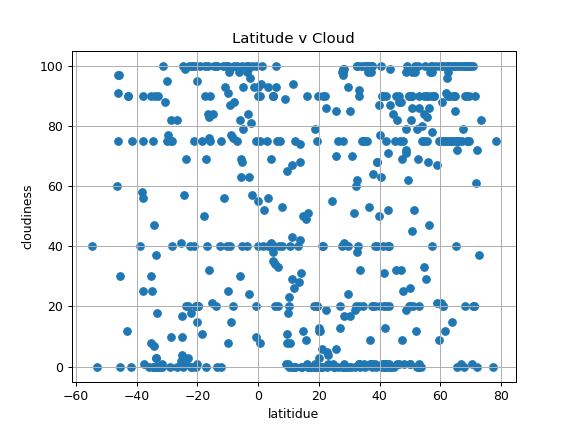

In [217]:
# Build a scatter plot for each data type
plt.scatter(wdplot["lat"], wdplot["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude v Cloud")
plt.ylabel("cloudiness")
plt.xlabel("latitidue")
plt.grid(True)

# Save the figure
plt.savefig("latvcloud.png")

# Show plot
plt.show()
#This is an interesting graph as it shows a linear clumping of cloud cover but also makes sense since consistently cloudy regions exist colder areas

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


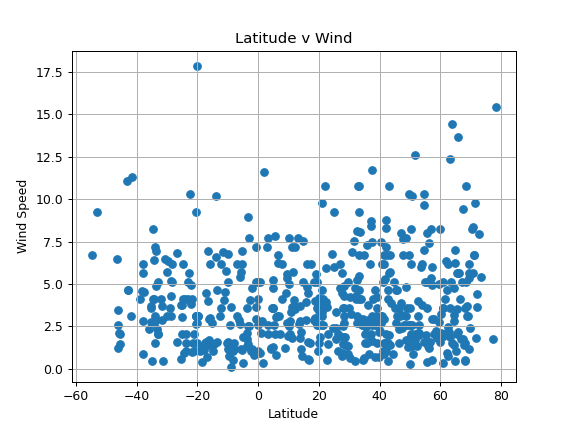

In [218]:
# Build a scatter plot for each data type
plt.scatter(wdplot["lat"], wdplot["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude v Wind")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat v Wind.png")

# Show plot
plt.show()
#Analysis: Wind speed is increasing away from the equator and especially at higher latitudes 

## Linear Regression

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import matplotlib.pyplot as plt
from scipy import stats
import logging
logging.basicConfig(level=logging.DEBUG)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [232]:
#weather_data_to_load= "weather_data.csv"
#weather_data = pd.read_csv(weather_data_to_load)

#weather_data_print_example= "weather_data_print.csv"
#weather_data_print = pd.read_csv(weather_data_print_example)


weather_north_to_load= "Weather_Data_South.csv"
wdn = pd.read_csv(weather_north_to_load)

weather_south_to_load= "Weather_Data_South.csv"
wds = pd.read_csv(weather_south_to_load)

weather_north_to_load= "Weather_Data_North.csv"
wdn = pd.read_csv(weather_north_to_load)

weather_south_to_load= "Weather_Data_South.csv"
wds = pd.read_csv(weather_south_to_load)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="

In [234]:
weather_data

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date
0,Lebu,CL,-37.6167,-73.6500,17.99,17.99,1,73,4.52,1614967499
1,Jamestown,US,42.0970,-79.2353,-3.10,-2.78,90,91,8.32,1614967499
2,Barrow,US,71.2906,-156.7887,-23.00,-23.00,90,64,9.77,1614967500
3,Dunedin,NZ,-45.8742,170.5036,9.96,9.96,97,81,2.14,1614967500
4,Tasiilaq,GL,65.6145,-37.6368,4.00,4.00,75,81,5.66,1614968031
...,...,...,...,...,...,...,...,...,...,...
547,Muroto-misakicho,JP,33.2833,134.1500,16.31,16.31,92,78,5.48,1614968344
548,Tabas,IR,33.5959,56.9244,20.02,20.02,32,44,8.04,1614968345
549,Boa Vista,BR,2.8197,-60.6733,32.00,32.00,75,45,7.20,1614968345
550,Roura,GF,4.7263,-52.3274,26.55,27.22,90,83,3.60,1614968345


In [235]:
wdn= weather_data.loc[weather_data['lat'] > 0]
wdn

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date
1,Jamestown,US,42.0970,-79.2353,-3.10,-2.78,90,91,8.32,1614967499
2,Barrow,US,71.2906,-156.7887,-23.00,-23.00,90,64,9.77,1614967500
4,Tasiilaq,GL,65.6145,-37.6368,4.00,4.00,75,81,5.66,1614968031
6,Navalcarnero,ES,40.2891,-4.0120,13.95,15.00,20,54,2.84,1614968032
7,Raudeberg,NO,61.9875,5.1352,3.89,3.89,100,94,6.34,1614968032
...,...,...,...,...,...,...,...,...,...,...
545,Port-de-Bouc,FR,43.4000,4.9833,14.02,15.00,87,47,6.69,1614968344
547,Muroto-misakicho,JP,33.2833,134.1500,16.31,16.31,92,78,5.48,1614968344
548,Tabas,IR,33.5959,56.9244,20.02,20.02,32,44,8.04,1614968345
549,Boa Vista,BR,2.8197,-60.6733,32.00,32.00,75,45,7.20,1614968345


In [236]:
wdn= pd.DataFrame(wdn)
type(wdn)

pandas.core.frame.DataFrame

In [237]:
wdn.to_csv("Weather_Data_North.csv", encoding='utf-8', index=False)


In [19]:
weather_north_to_load= "Weather_Data_North.csv"
wdn = pd.read_csv(weather_north_to_load)

In [238]:
wds= weather_data.loc[weather_data['lat'] < 0]
wds

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date
0,Lebu,CL,-37.6167,-73.6500,17.99,17.99,1,73,4.52,1614967499
3,Dunedin,NZ,-45.8742,170.5036,9.96,9.96,97,81,2.14,1614967500
5,Rikitea,PF,-23.1203,-134.9692,26.73,26.73,3,80,4.13,1614968031
8,Richards Bay,ZA,-28.7830,32.0377,23.52,23.52,82,89,4.27,1614967853
13,Capão da Canoa,BR,-29.7456,-50.0097,26.64,26.64,77,69,6.35,1614968035
...,...,...,...,...,...,...,...,...,...,...
532,Boyolangu,ID,-8.1181,111.8935,24.37,24.37,100,85,1.55,1614968339
538,Aripuanã,BR,-9.1667,-60.6333,27.39,27.39,87,89,1.38,1614968341
544,Amuntai,ID,-2.4177,115.2494,23.59,23.59,81,90,1.06,1614968343
546,Innisfail,AU,-17.5333,146.0333,23.69,23.69,100,88,1.38,1614968344


In [239]:
wds.to_csv("Weather_Data_South.csv", encoding='utf-8', index=False)


In [22]:
weather_south_to_load= "Weather_Data_South.csv"
wds = pd.read_csv(weather_south_to_load)

In [240]:
wds

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date
0,Lebu,CL,-37.6167,-73.6500,17.99,17.99,1,73,4.52,1614967499
3,Dunedin,NZ,-45.8742,170.5036,9.96,9.96,97,81,2.14,1614967500
5,Rikitea,PF,-23.1203,-134.9692,26.73,26.73,3,80,4.13,1614968031
8,Richards Bay,ZA,-28.7830,32.0377,23.52,23.52,82,89,4.27,1614967853
13,Capão da Canoa,BR,-29.7456,-50.0097,26.64,26.64,77,69,6.35,1614968035
...,...,...,...,...,...,...,...,...,...,...
532,Boyolangu,ID,-8.1181,111.8935,24.37,24.37,100,85,1.55,1614968339
538,Aripuanã,BR,-9.1667,-60.6333,27.39,27.39,87,89,1.38,1614968341
544,Amuntai,ID,-2.4177,115.2494,23.59,23.59,81,90,1.06,1614968343
546,Innisfail,AU,-17.5333,146.0333,23.69,23.69,100,88,1.38,1614968344


### HEMISPHEREIC WEATHER DATA


In [241]:
wdn

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date
1,Jamestown,US,42.0970,-79.2353,-3.10,-2.78,90,91,8.32,1614967499
2,Barrow,US,71.2906,-156.7887,-23.00,-23.00,90,64,9.77,1614967500
4,Tasiilaq,GL,65.6145,-37.6368,4.00,4.00,75,81,5.66,1614968031
6,Navalcarnero,ES,40.2891,-4.0120,13.95,15.00,20,54,2.84,1614968032
7,Raudeberg,NO,61.9875,5.1352,3.89,3.89,100,94,6.34,1614968032
...,...,...,...,...,...,...,...,...,...,...
545,Port-de-Bouc,FR,43.4000,4.9833,14.02,15.00,87,47,6.69,1614968344
547,Muroto-misakicho,JP,33.2833,134.1500,16.31,16.31,92,78,5.48,1614968344
548,Tabas,IR,33.5959,56.9244,20.02,20.02,32,44,8.04,1614968345
549,Boa Vista,BR,2.8197,-60.6733,32.00,32.00,75,45,7.20,1614968345


In [242]:
wds

,citylist,country,lat,lon,temp,temp_max,cloudiness,humidity,windspeed,date
0,Lebu,CL,-37.6167,-73.6500,17.99,17.99,1,73,4.52,1614967499
3,Dunedin,NZ,-45.8742,170.5036,9.96,9.96,97,81,2.14,1614967500
5,Rikitea,PF,-23.1203,-134.9692,26.73,26.73,3,80,4.13,1614968031
8,Richards Bay,ZA,-28.7830,32.0377,23.52,23.52,82,89,4.27,1614967853
13,Capão da Canoa,BR,-29.7456,-50.0097,26.64,26.64,77,69,6.35,1614968035
...,...,...,...,...,...,...,...,...,...,...
532,Boyolangu,ID,-8.1181,111.8935,24.37,24.37,100,85,1.55,1614968339
538,Aripuanã,BR,-9.1667,-60.6333,27.39,27.39,87,89,1.38,1614968341
544,Amuntai,ID,-2.4177,115.2494,23.59,23.59,81,90,1.06,1614968343
546,Innisfail,AU,-17.5333,146.0333,23.69,23.69,100,88,1.38,1614968344


####  Northern Hemisphere - Temperature vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


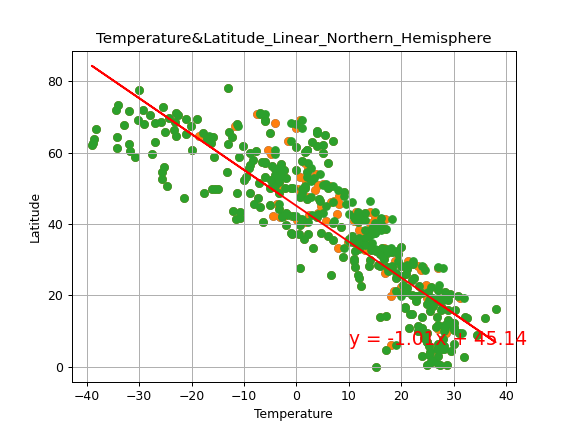

In [250]:
# start with values and labels
x_values = wdn['temp']
y_values = wdn['lat']
plt.scatter(x_values,y_values)
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title("Temperature&Latitude_Linear_Northern_Hemisphere")
plt.show()

x_values = wdn["temp"] 
y_values = wdn["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.show()

In [251]:
 # Print out the r-squared value along with the plot.
plt.savefig("north_lat_temp.png")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,6),fontsize=15,color="red")
#plt.xlabel('Time')
#plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.7640948481971067


In [252]:
x_values = wdn["temp_max"] 
y_values = wdn["lat"] 
plt.scatter(x_values,y_values) 
plt.xlabel("Temperature") 
plt.ylabel("Latitude") 
plt.grid(True)

plt.show()

#Analysis:  As the plots move northward the temperarure becomes less dense and much colder.

####  Southern Hemisphere - Temperature vs. Latitude Linear Regression

In [265]:
# start with values and labels
x_values = wds['temp']
y_values = wds['lat']
plt.scatter(x_values,y_values)
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title('Latitude&Temperature_Southern_Hemisphere')

plt.show()

x_values = wds["temp"] 
y_values = wds["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

<IPython.core.display.Javascript object>


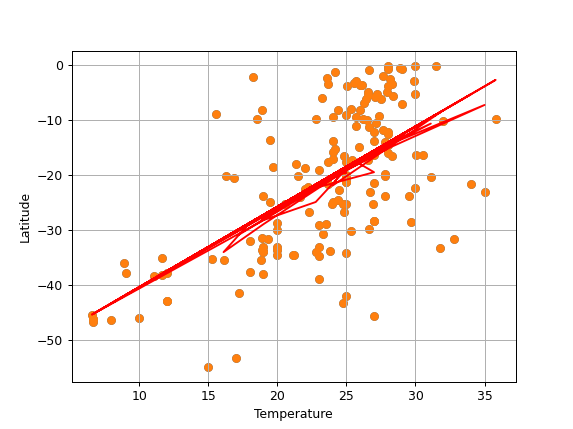

In [266]:
x_values = wds["temp_max"] 
y_values = wds["lat"] 
plt.scatter(x_values,y_values) 
plt.xlabel("Temperature") 
plt.ylabel("Latitude") 
plt.grid(True)
plt.savefig("south_lat_temp.png")

plt.show()

In [267]:
 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Time')
#plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.4049857558336152


#As we move towards the equator the temperature rises substantially at a total amount of over 25 degress Celcius.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


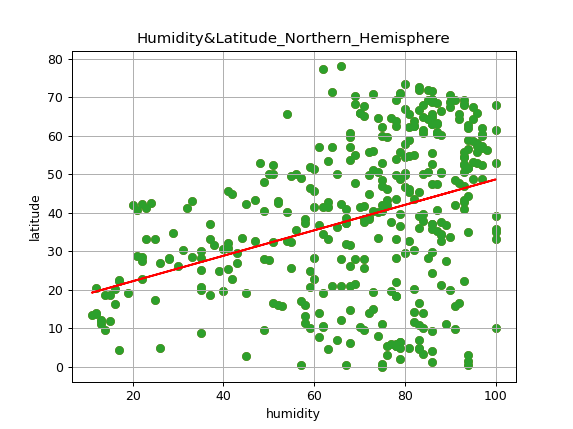

The r-squared is: 0.1363365162429723


In [269]:
# start with values and labels
x_values = wdn['humidity']
y_values = wdn['lat']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

x_values = wdn["humidity"] 
y_values = wdn["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Time')
#plt.ylabel(‘Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# Plot out humidity over time 
x_values = wdn["humidity"] 
y_values = wdn["lat"] 
plt.scatter(x_values,y_values)
plt.xlabel("humidity")
plt.ylabel("latitude") 
plt.grid(True)
plt.title('Humidity&Latitude_Northern_Hemisphere')
plt.savefig("morth_lat_humid.png")

plt.show()


#Analysis: Although it is commonly thought that equatorial regions are more humid than northernly places, the graph here shows that there is a trend towards more humidity the farther north it goes.  The trend is not extreme, but signficant enough to be worth noting. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


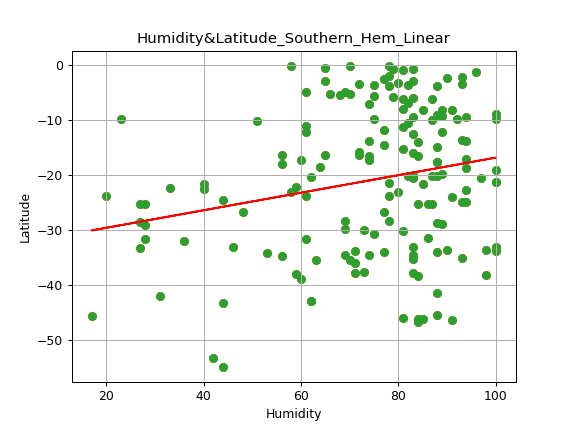

The r-squared is: 0.05125782589879357


In [270]:

# start with values and labels
x_values = wds['humidity']
y_values = wds['lat']
plt.scatter(x_values,y_values)
plt.xlabel('humidityerature')
plt.ylabel('Latitude')
plt.show()

x_values = wds["humidity"] 
y_values = wds["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Time')
#plt.ylabel(‘Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# Plot out humidity over time 
x_values = wds["humidity"] 
y_values = wds["lat"] 
plt.scatter(x_values,y_values) 
plt.xlabel("Humidity") 
plt.ylabel("Latitude") 
plt.grid(True)
plt.title("Humidity&Latitude_Southern_Hem_Linear")
plt.savefig("south_lat_humid.png")

plt.show()



#Analysis:  Although the humidity is pretty scattered, the trend increases slightly as the data points move to the equator.  However, there is more land in the northern hemisphere so that is a major factor when considering this data.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


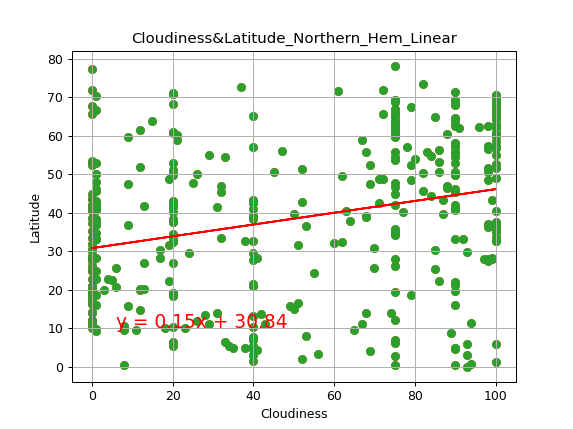

The r-squared is: 0.08334702261463427


In [271]:
# start with values and labels
x_values = wdn['cloudiness']
y_values = wdn['lat']
plt.scatter(x_values,y_values)
plt.xlabel('cloudinesserature')
plt.ylabel('Latitude')
plt.show()

x_values = wdn["cloudiness"] 
y_values = wdn["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel(‘L’atitude)
#plt.ylabel(‘cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# Plot out cloudiness over time 
x_values = wdn["cloudiness"] 
y_values = wdn["lat"] 
plt.scatter(x_values,y_values) 
plt.xlabel("Cloudiness") 
plt.ylabel("Latitude")
plt.grid(True)
plt.title("Cloudiness&Latitude_Northern_Hem_Linear")
plt.savefig("north_cloud_lat.png")

plt.show()

#Analysis: There is more cloud cover at the poles but only slightly

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


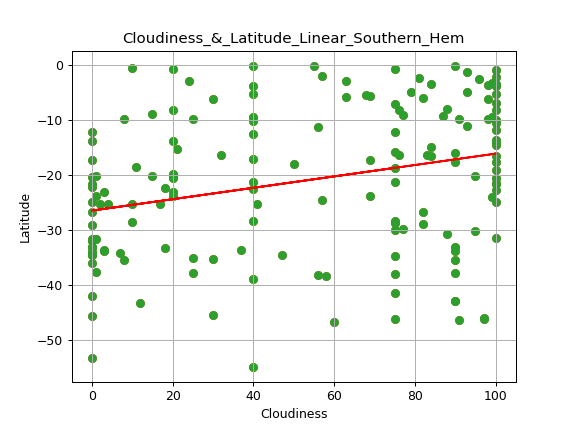

The r-squared is: 0.08686263963433809


In [272]:
# start with values and labels
x_values = wds['cloudiness']
y_values = wds['lat']
plt.scatter(x_values,y_values)
plt.xlabel('cloudinesserature')
plt.ylabel('Latitude')
plt.show()

x_values = wds["cloudiness"] 
y_values = wds["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel(‘L’atitude)
#plt.ylabel(‘cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# Plot out cloudiness over time 
x_values = wds["cloudiness"] 
y_values = wds["lat"] 
plt.scatter(x_values,y_values) 
plt.xlabel("Cloudiness") 
plt.ylabel("Latitude") 
plt.title("Cloudiness_&_Latitude_Linear_Southern_Hem")
plt.grid(True)
plt.savefig("south_lat_cloud.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


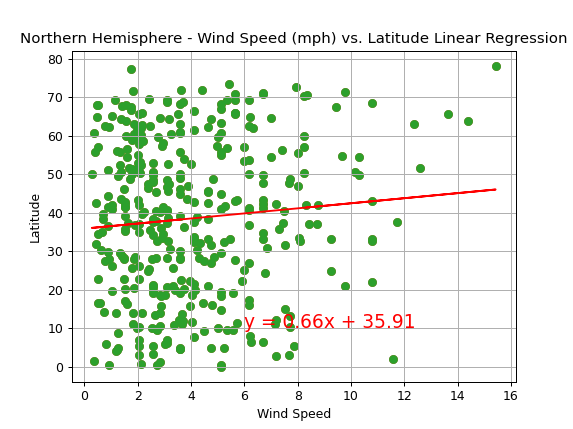

The r-squared is: 0.007790975102185657


In [273]:
# start with values and labels
x_values = wdn['windspeed']
y_values = wdn['lat']
plt.scatter(x_values,y_values)
plt.xlabel('windspeederature')
plt.ylabel('Latitude')
plt.show()

x_values = wdn["windspeed"] 
y_values = wdn["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel(‘Latitude)
#plt.ylabel(‘windspeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# Plot out windspeed over time 
x_values = wdn["windspeed"] 
y_values = wdn["lat"] 
plt.scatter(x_values,y_values) 
plt.xlabel("Wind Speed") 
plt.ylabel("Latitude") 
plt.grid(True)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("north_wind_lat.png")

plt.show()


#Analysis:  The wind speed increases slight as we move towards the pole.  Not as much as I would have thought but then again, the equatorial area does have the phenomenon of hurricanes and such so it would be interesting to see the data if we removed extreme weather events and plotted it every day over the span of a year.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


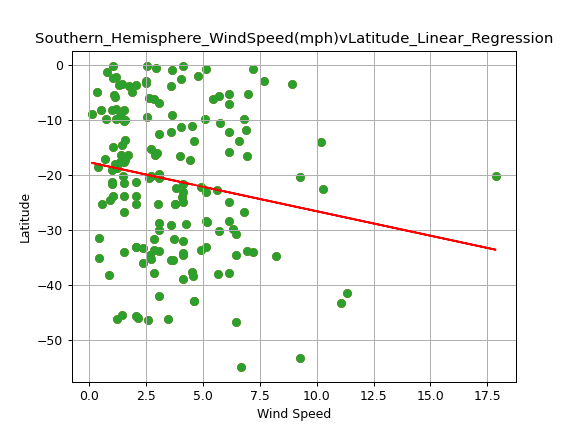

The r-squared is: 0.030263176661959865


In [274]:
# start with values and labels
x_values = wds['windspeed']
y_values = wds['lat']
plt.scatter(x_values,y_values)
plt.xlabel('windspeederature')
plt.ylabel('Latitude')
plt.show()

x_values = wds["windspeed"] 
y_values = wds["lat"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


 # Print out the r-squared value along with the plot.

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel(‘Latitude)
#plt.ylabel(‘windspeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# Plot out windspeed over time 
x_values = wds["windspeed"] 
y_values = wds["lat"] 
plt.scatter(x_values,y_values) 
plt.xlabel("Wind Speed") 
plt.ylabel("Latitude") 
plt.grid(True)
plt.title("Southern_Hemisphere_WindSpeed(mph)vLatitude_Linear_Regression")
plt.savefig("south_lat_wind.png")

plt.show()

#Analysis:  The wind speed increases slighty as we move towards the south pole but again, if we removed extreme weather events, over the course of the year instead of a day, it would be interesting so note the differences.  

End of Weather Py Redo 